## Visualization: Uncovering the Story Behind Movie Success 

This notebook explores the TMDB 5000 movies dataset, analyzing key factors behind movie success using data cleaning, feature engineering, and visualizations.

It also tests **my hypothesis** that - "*movies belonging to multiple genres (cross-genre movies) tend to generate higher revenues, but do not necessarily receive higher audience ratings.*"

In [1]:
# Download the requirements
!pip install -q seaborn pandas numpy matplotlib

In [2]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

In [3]:
# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
# Load the dataset
movies = pd.read_csv('tmdb-movie-metadata/tmdb_5000_movies.csv')

In [5]:
# First few rows of the dataset
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
# Little info about the dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [7]:
# Missing values in the dataset
movies.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

### Data Cleaning and Preprocessing

In [8]:
# Drop rows with zero or missing budget/revenue
movies = movies[(movies['budget'] > 0) & (movies['revenue'] > 0)]

# Handle missing runtime using median
movies['runtime'] = movies['runtime'].fillna(movies['runtime'].median())

In [9]:
# Transform genres from string to list
def parse_genres(genres_str):
    try:
        return [genre['name'] for genre in ast.literal_eval(genres_str)]
    except (ValueError, SyntaxError):
        return []

movies['genres_list'] = movies['genres'].apply(parse_genres)
movies['num_genres'] = movies['genres_list'].apply(len)
movies['primary_genre'] = movies['genres_list'].apply(lambda x: x[0] if x else "Unknown")

In [10]:
# Add profit column
movies['profit'] = movies['revenue'] - movies['budget']

### The Plot (Pun intended)

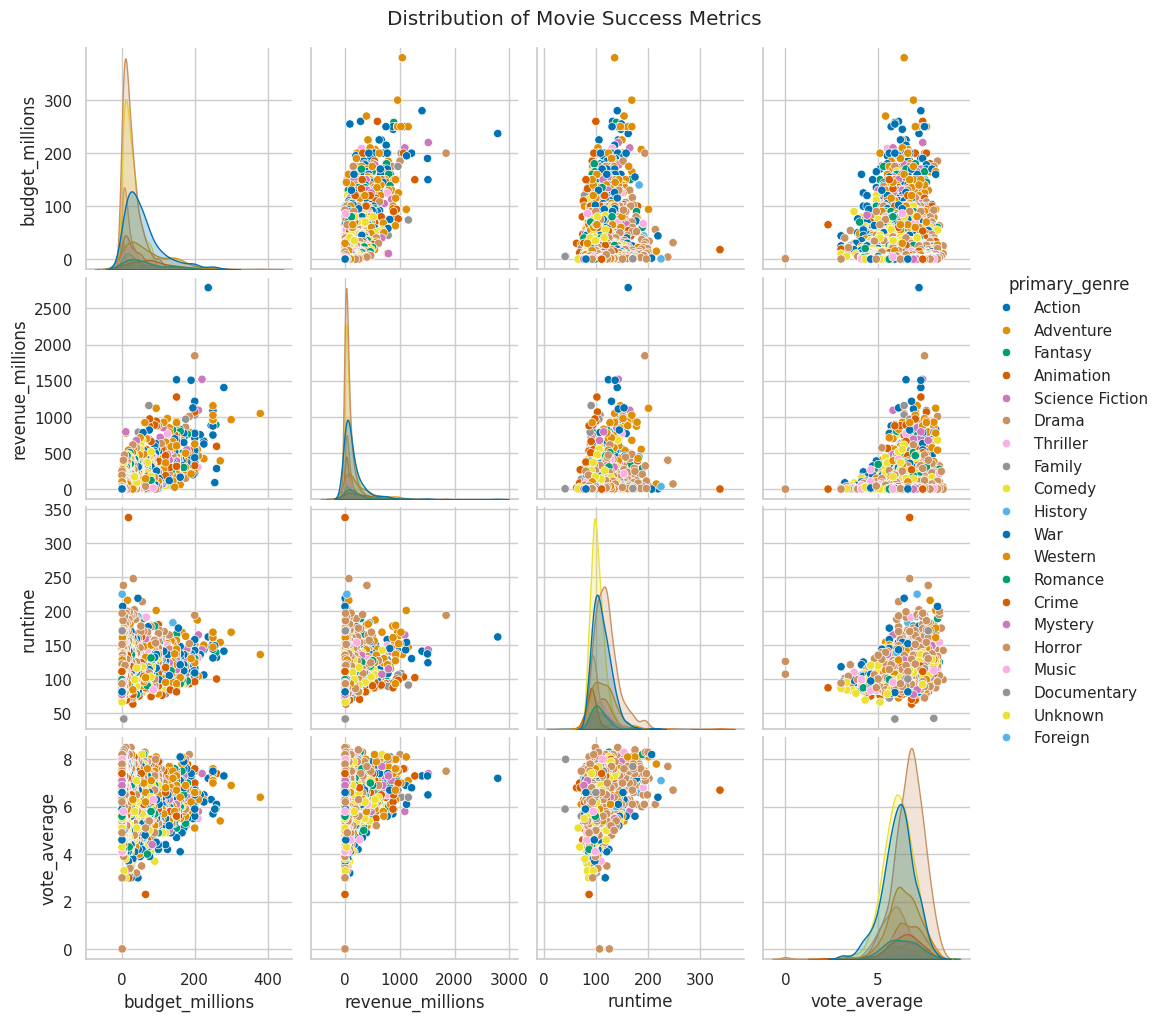

In [11]:
# 1. Distribution of success (pair plot)
movies['budget_millions'] = movies['budget'] / 1e6
movies['revenue_millions'] = movies['revenue'] / 1e6

sns.pairplot(movies, vars=['budget_millions', 'revenue_millions', 'runtime', 'vote_average'], diag_kind='kde', hue='primary_genre', palette='colorblind')
plt.suptitle('Distribution of Movie Success Metrics', y=1.02)
plt.show()

**Insights**
1. Budget vs Revenue - Positive Correlation, but not perfect
2. Runtime Distribution - Clustered around ~100-150 min
3. Genre plays a large role in budget allocation and financial potential

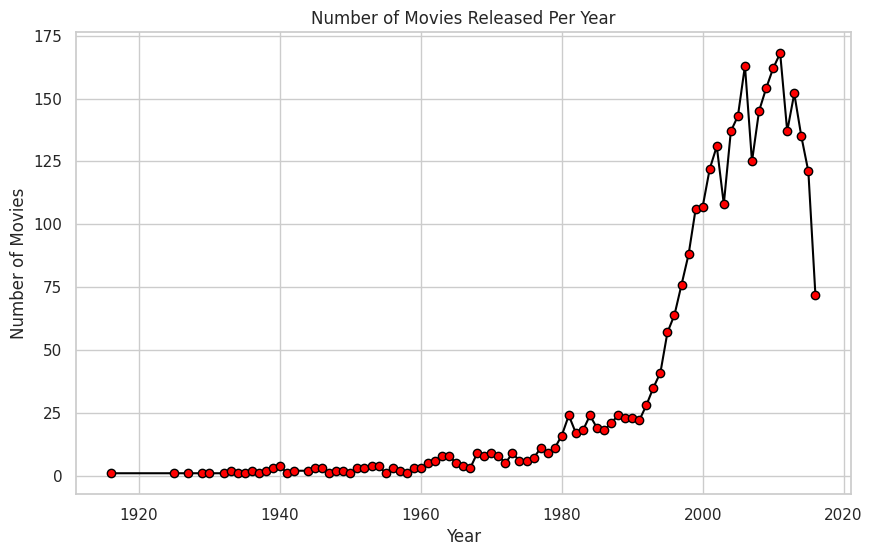

In [12]:
# 2.A. Time series of movie releases
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
movies['year'] = movies['release_date'].dt.year
yearly_releases = movies.groupby('year').size()
yearly_releases.plot(kind='line', marker='o', color='black', markersize=6, markerfacecolor='red')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

**Insights**
1. Movie releases grew slowly until the 1980s, then surged sharply and peaked around 2005–2015.
2. After 2015, releases declined significantly, likely due to streaming shifts and the 2020 pandemic.

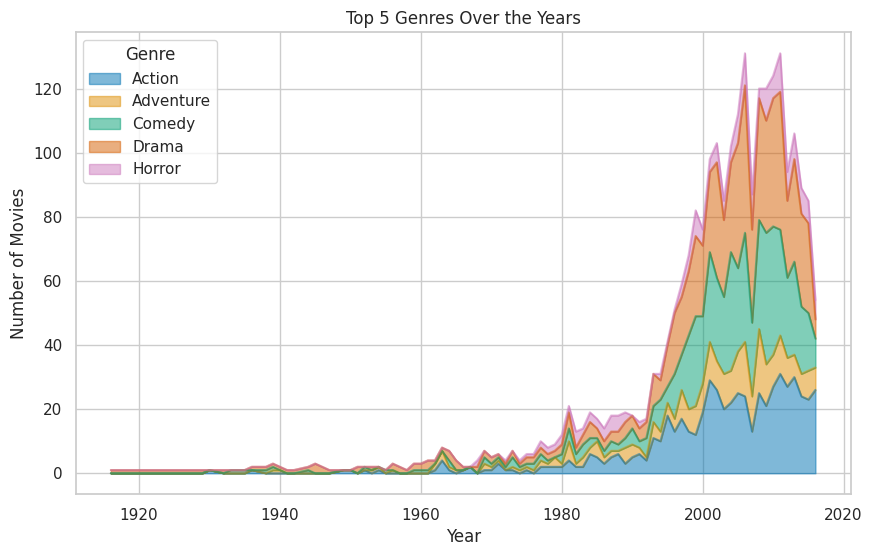

In [13]:
# 2.B. Stacked area chart of top 5 genres over years
top_genres = movies['primary_genre'].value_counts().nlargest(5).index
genre_yearly = movies[movies['primary_genre'].isin(top_genres)].groupby(['year', 'primary_genre']).size().unstack(fill_value=0)
cb_palette = sns.color_palette("colorblind", 5)
genre_yearly.plot(kind='area', stacked=True, alpha=0.5, color=cb_palette)
plt.title('Top 5 Genres Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre')
plt.show()

**Insights**
1. Since the 1980s, Action, Adventure, and Comedy have dominated, with sharp growth peaking in the 2000s.
2. Drama and Horror also grew steadily but remained smaller in scale compared to Action and Comedy.

In [14]:
# Extract director from crew
def extract_director(directors_str):
    try:
        crew = ast.literal_eval(directors_str)
        for d in crew:
            if d['job'] == 'Director':
                return d['name']
    except (ValueError, SyntaxError):
        return "Unknown"

credits = pd.read_csv('tmdb-movie-metadata/tmdb_5000_credits.csv')
movies = movies.merge(credits[['movie_id', 'crew']], left_on='id', right_on='movie_id', how='left')
movies['director'] = movies['crew'].apply(extract_director)

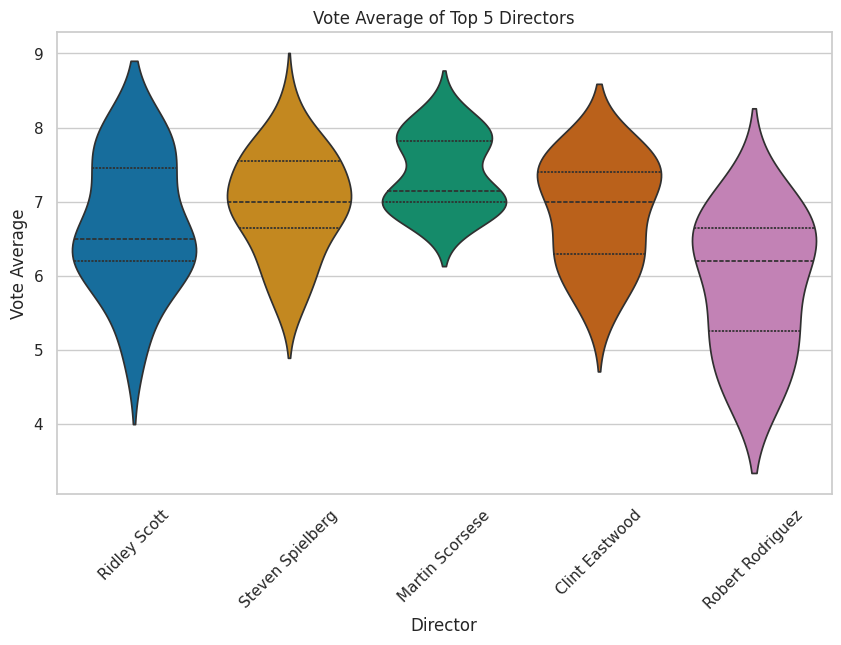

In [15]:
# 3.A. Violin plot of top 5 directors by vote average
top_directors = movies['director'].value_counts().nlargest(5).index
top_director_movies = movies[movies['director'].isin(top_directors)]
palette = sns.color_palette("colorblind", n_colors=len(top_directors))
sns.violinplot(x='director', y='vote_average', data=top_director_movies, inner='quartile', palette=palette)
plt.title('Vote Average of Top 5 Directors')
plt.xlabel('Director')
plt.ylabel('Vote Average')
plt.xticks(rotation=45)
plt.show()

**Insights**
1. Martin Scorsese consistently has the highest vote averages, with most of his movies rated above 7.
2. Robert Rodriguez shows the widest spread, ranging from below 5 to above 7, indicating more variation in reception compared to the others.

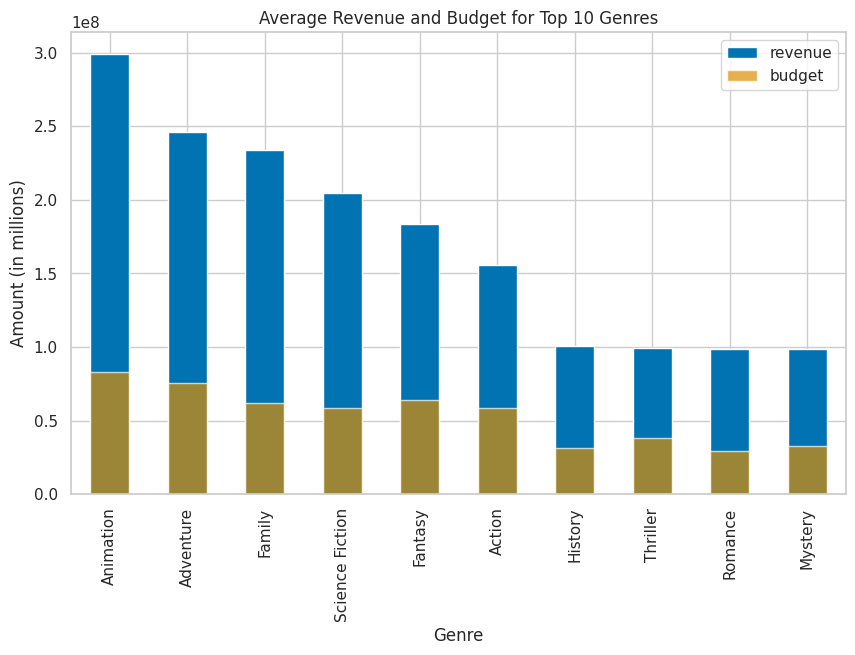

In [16]:
# 3.B. Bar chart of average revenue and budget for top 10 genres
stats = (movies.groupby('primary_genre')[['revenue', 'budget']].mean().sort_values(by='revenue', ascending=False).head(10))
palette = sns.color_palette("colorblind")
ax = stats[['revenue']].plot(kind='bar', color=palette[0], label='Average Revenue')
stats[['budget']].plot(kind='bar', color=palette[1], ax=ax, label='Average Budget', alpha=0.7)
plt.title('Average Revenue and Budget for Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Amount (in millions)')
plt.legend()
plt.show()

**Insights**
1. Animation, Adventure, and Family genres generate the highest revenues, far exceeding their budgets, making them the most profitable.
2. Romance, Mystery, and Thriller have much lower revenues, with profits only slightly above their budgets.

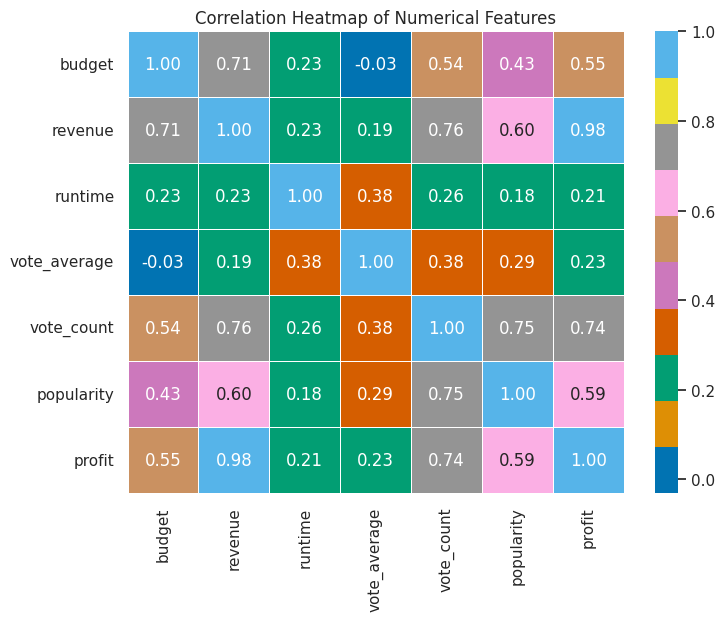

In [17]:
# 4. Correlation heatmap of numerical features
numerical_features = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count', 'popularity', 'profit']
corr_matrix = movies[numerical_features].corr()
palette = sns.color_palette("colorblind")
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap=palette, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Insights**
1. Revenue and Profit are almost perfectly correlated (0.98) - Duh, cuz profit = revenue - budget.
2. Budget has a strong positive correlation with Revenue (0.71) - Bigger the budget bigger the boxoffice ig.
3. Runtime has weak correlations overall.

The above plots are plotted cuz they are asked in the assignment. The below are to test my hypothesis

#### 1. Revenue distribution by number of genres

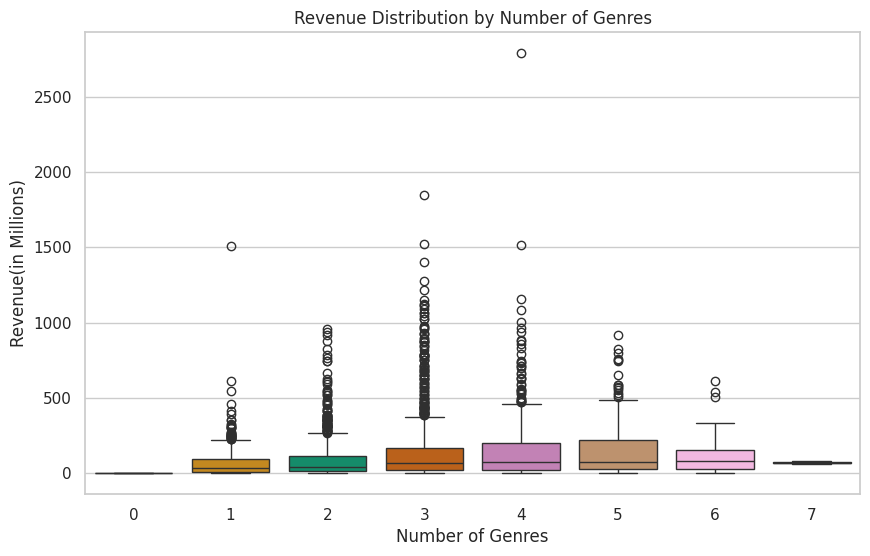

In [18]:
palette = sns.color_palette("colorblind")
sns.boxplot(x='num_genres', y='revenue_millions', data=movies, palette=palette)
plt.title('Revenue Distribution by Number of Genres')
plt.xlabel('Number of Genres')
plt.ylabel('Revenue(in Millions)')
plt.show()

The plot shows that movies with more genres generally have higher revenue, supporting the hypothesis for revenue.

#### 2. Audience ratings distribution by number of genres

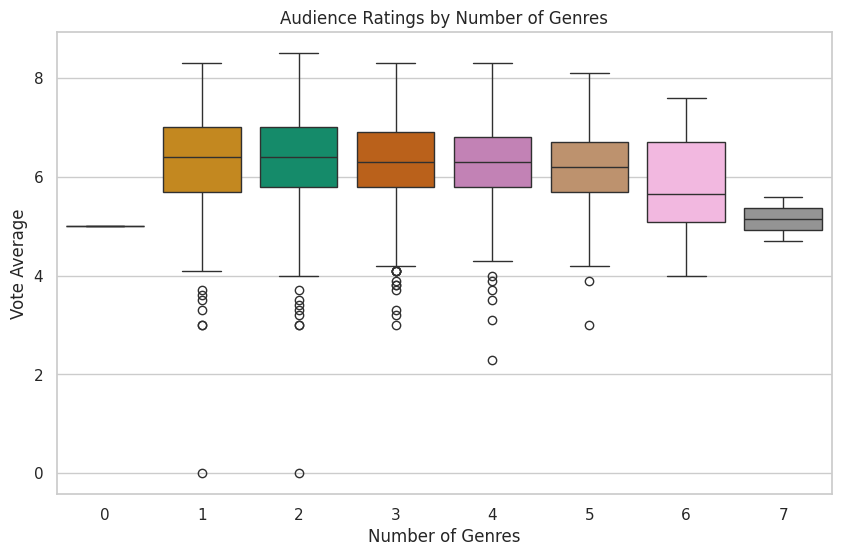

In [19]:
palette = sns.color_palette("colorblind")
sns.boxplot(x='num_genres', y='vote_average', data=movies, palette=palette)
plt.title('Audience Ratings by Number of Genres')
plt.xlabel('Number of Genres')
plt.ylabel('Vote Average')
plt.show()

The plot indicates that movies with more genres do not consistently have higher audience ratings, supporting the hypothesis for ratings.

#### 3. Relationship between number of genres and revenue

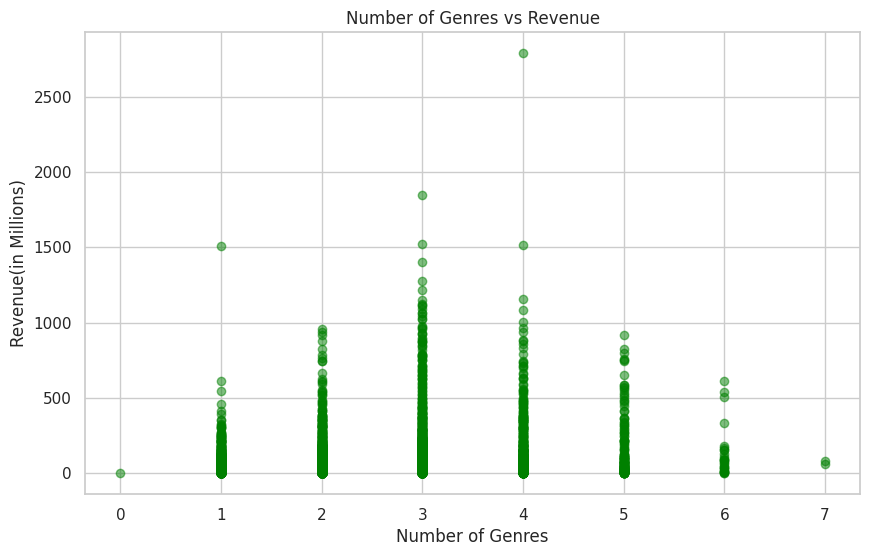

In [20]:
plt.scatter(movies['num_genres'], movies['revenue_millions'], alpha=0.5, color='green')
plt.title('Number of Genres vs Revenue')
plt.xlabel('Number of Genres')
plt.ylabel('Revenue(in Millions)')
plt.show()

Not in total support with the hypothesis - But when the number of genre is less (<5) we see that more the number of genre a film supports better would be its box office collection. 

**Interesting Observation**: The Revenue seems to increase and then fall off after some time sorta like a normal distribution

#### 4. Relationship between number of genres and audience ratings

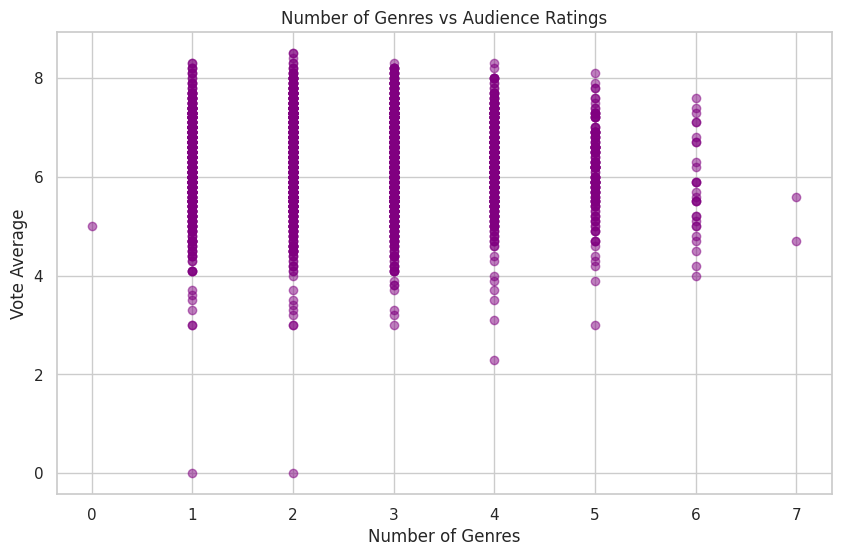

In [21]:
plt.scatter(movies['num_genres'], movies['vote_average'], alpha=0.5, color='purple')
plt.title('Number of Genres vs Audience Ratings')
plt.xlabel('Number of Genres')
plt.ylabel('Vote Average')
plt.show()

There is no clear trend between number of genres and audience ratings, suggesting cross-genre movies do not necessarily get higher ratings.

#### 5. Average revenue and rating by genre group

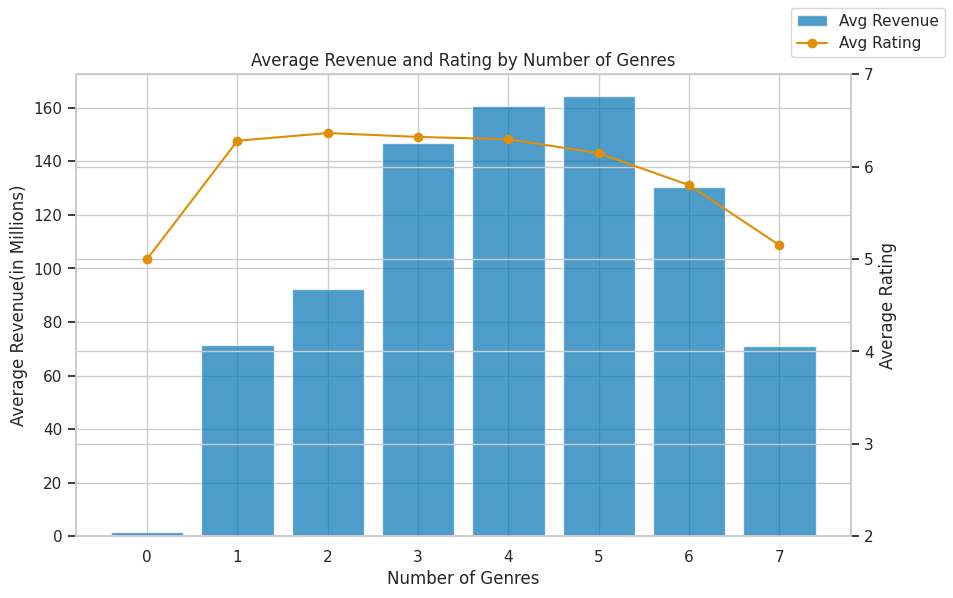

In [22]:
grouped = movies.groupby('num_genres').agg({'revenue_millions': 'mean', 'vote_average': 'mean'}).reset_index()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
palette = sns.color_palette("colorblind")
ax1.bar(grouped['num_genres'], grouped['revenue_millions'], color=palette[0], label='Avg Revenue', alpha=0.7)
ax2.plot(grouped['num_genres'], grouped['vote_average'], color=palette[1], marker='o', label='Avg Rating')
ax1.set_xlabel('Number of Genres')
ax1.set_ylabel('Average Revenue(in Millions)')
ax2.set_ylabel('Average Rating')
ax2.set_ylim(2, 7)
plt.title('Average Revenue and Rating by Number of Genres')
fig.legend(loc='upper right')
plt.show()

The combined chart shows that average revenue increases with number of genres, while average rating remains relatively stable.

**Final Conclusions**
1. **Revenue** - Movies that span multiple genres generally achieve higher revenues compared to single-genre films. This suggests that cross-genre storytelling broadens audience appeal and market reach.
2. **Ratings** - Audience ratings, however, remain relatively stable or even decline slightly as the number of genres increases, indicating that while such movies may attract larger crowds, they do not necessarily earn stronger critical or audience approval.

In summary, cross-genre movies maximize commercial success but not audience ratings, aligning with the hypothesis.